# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response_data = requests.get(btc_url).json()

# Current BTC price in Canadian Dollars
btc_cad=btc_response_data["data"]["1"]["quotes"]["CAD"]["price"]
# Current BTC price in US Dollars
btc=btc_response_data["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
eth_response_data = requests.get(eth_url).json()
# Current ETH price in Canadian Dollars
eth_cad=eth_response_data["data"]["1027"]["quotes"]["CAD"]["price"]
# Current ETH price in US Dollars
eth=eth_response_data["data"]["1027"]["quotes"]["USD"]["price"]


print(f"Current BTC closing price in CAD: ${btc_cad:0.2f}")
print(f"Current BTC closing price in USD: ${btc}")
print(f"--------------------------------------------")
print(f"Current ETH closing price in CAD: ${eth_cad:0.2f}")
print(f"Current ETH closing price in USD: ${eth}")


Current BTC closing price in CAD: $17019.94
Current BTC closing price in USD: $12964.61
--------------------------------------------
Current ETH closing price in CAD: $541.86
Current ETH closing price in USD: $412.75


In order to perform portfolio analysis, all portfolio assests need to be expressed in the same currency. While the homework instructions requested to fetch the Crypto asset prices in CAD, the SPY and AGG prices in Alpaca are only available in USD. I will therefore use the USD prices of Crypto assets in my analysis.

In [6]:
# Compute current value of my crypto
my_btc_value=my_btc*btc
my_eth_value=my_eth*eth
# The USD value of Cypto assests
crypto = my_btc_value + my_eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")
print(f"The current value of your Crypto is ${crypto:0.2f}")

The current value of your 1.2 BTC is $15557.53
The current value of your 5.3 ETH is $2187.57
The current value of your Crypto is $17745.11


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [9]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-22", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df
# Preview DataFrame
df_portfolio

AGG                                     SPY  \
                             open    high    low   close   volume    open   
2020-10-22 00:00:00-04:00  117.51  117.54  117.3  117.31  3933253  342.96   

                                                             
                             high     low   close    volume  
2020-10-22 00:00:00-04:00  345.24  340.65  344.63  45033179

In [10]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.31
Current SPY closing price: $344.63


In [11]:
# Compute the current USD value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
shares = my_spy_value + my_agg_value

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your Shares is ${shares:0.2f}")


The current value of your 50 SPY shares is $17231.50
The current value of your 200 AGG shares is $23462.00
The current value of your Shares is $40693.50


### Savings Health Analysis

I am making an assumption that the income is expressed in the US dollars since I am analysing the investment account whose values are expressed in the USD.

In [12]:
# Set monthly household income (in the USD)
monthly_income = 12000

# Create savings DataFrame
investments_data = {"AMOUNT": [crypto, shares]}
investments = ["CRYPTO", "SHARES"]

# Create Savings DataFrame with `investments` as index
df_savings = pd.DataFrame(investments_data, index=investments)

# Display Savings data
df_savings

,AMOUNT
CRYPTO,17745.107
SHARES,40693.500


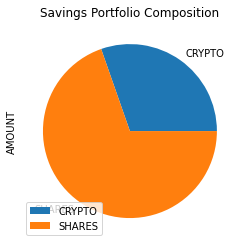

In [13]:
# Plot savings pie chart
df_savings.plot.pie(y="AMOUNT", title="Savings Portfolio Composition")

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

print(f"The emergency fund needed is ${emergency_fund:0.2f}")

# Calculate total amount of savings
current_total_savings=crypto+shares
print(f"The current total savings are ${current_total_savings:0.2f}")

# Compare the Total Savings amount to the amount of the required Emergency Fund
# Validate saving health
if current_total_savings > emergency_fund:
    print(f"Congratulations! Your emergency fund in good shape and you have a surplas of ${(current_total_savings-emergency_fund):0.2f}")
elif current_total_savings == emergency_fund:
    print(f"Congratulations! Your have reached your financial goal and your emegency funds meets your minimum requirement of ${(emergency_fund):0.2f}")
else: 
    print(f"Keep up the good work! You are ${(emergency_fund-current_total_savings):0.2f} away from reaching your emergency fund goal of ${(emergency_fund):0.2f}")


The emergency fund needed is $36000.00
The current total savings are $58438.61
Congratulations! Your emergency fund in good shape and you have a surplas of $22438.61


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-10-22', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-22', tz='America/New_York').isoformat()

# Set timeframe to '1
timeframe="1D"


In [16]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
# Display sample data
df_stock_data.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
2015-10-22 00:00:00-04:00  109.90  110.05  109.83  109.94  1817244  202.98   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632  207.25   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981  207.30   
2015-10-27 00:00:00-04:00  110.03  110.03  109.88  109.95  1791888  206.20   
2015-10-28 00:00:00-04:00  109.98  110.05  109.57  109.63  1474796  206.97   

                                                              
                             high     low   close     volume  
2015-10-22 00:00:00-04:00  205.51  202.81  205.22  121670959  
2015-10-23 00:00:00-04:00  207.95  206.30  207.51  103135843  
2015-10-26 00:00:00-04:00  207.37  206.56  206.97   51484043  
2015-10-27 00:00:00-04:00  207.00  205.79  206.58   62899344  
2015-10-28 00:00:00-04:00  208.97  206.21  208.96  115482088

In [17]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# The weights of the portfolio are set at 40% for Bonds (AGG) and 60% for Stocks
MC = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30
)



In [18]:
# Print the simulation input data
MC.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
2015-10-22 00:00:00-04:00  109.90  110.05  109.83  109.94  1817244   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981   
2015-10-27 00:00:00-04:00  110.03  110.03  109.88  109.95  1791888   
2015-10-28 00:00:00-04:00  109.98  110.05  109.57  109.63  1474796   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-10-22 00:00:00-04:00          NaN  202.98  205.51  202.81  205.22   
2015-10-23 00:00:00-04:00    -0.001819  207.25  207.95  206.30  207.51   
2015-10-26 00:00:00-04:00     0.000456  207.30  207.37  206.56  206.97   
2015-10-27 00:00:00-04:00     0.001457  206.20  207.00  205.79  206.58   
2015-10-28 00:00:00-04:00    -0.002910  206.97  208.97  206.21  208.96   

                                                   
                              volume daily_return  
2015-10-22 00:00:00-04:00  121670959          NaN  
2015-10-23 00:00:00-04:00  103135843     0.011159  
2015-10-26 00:00:00-04:00   51484043    -0.002602  
2015-10-27 00:00:00-04:00   62899344    -0.001884  
2015-10-28 00:00:00-04:00  115482088     0.011521

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010474,1.011775,1.000180,1.010724,0.996010,1.005173,0.998099,0.995259,1.000839,0.990895,...,1.002459,1.006623,1.006111,1.008222,1.012492,0.997731,1.005342,1.000706,0.998149,0.993671
2,1.019924,1.006467,0.987955,1.004190,0.997567,1.009931,0.993634,0.987221,1.007328,0.994522,...,1.003968,1.007875,0.996854,0.992028,0.999170,0.994647,1.003365,1.000801,0.989298,1.004070
3,1.017512,0.997626,0.983938,1.000612,0.994772,1.002658,0.977908,0.976742,1.021542,1.002462,...,0.993338,1.006626,1.009384,0.984243,0.999070,1.010183,1.001037,1.007469,0.987937,1.008940
4,1.017861,0.986780,0.988979,0.994690,1.005588,1.014923,0.990852,0.979203,1.016450,1.008777,...,0.995957,1.005877,0.997988,0.979713,0.994068,1.002201,0.996581,0.995673,0.986410,1.011735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,12.001723,5.648172,1.813855,4.366460,4.879971,1.768209,34.353467,10.001729,14.353317,5.838418,...,4.906511,8.965176,1.668950,16.170224,10.443490,6.278240,17.766231,8.167381,12.980613,4.937460
7557,11.944834,5.642654,1.801030,4.367974,4.940653,1.760888,34.363084,10.077783,14.349618,5.839261,...,4.903191,8.991702,1.669663,16.249130,10.541204,6.272802,17.913632,8.121972,12.925907,4.908136
7558,11.803056,5.625741,1.808846,4.336713,4.864571,1.754673,34.124130,10.058054,14.256605,5.849173,...,4.836488,9.004511,1.666656,16.314691,10.546745,6.279945,17.878665,8.070836,13.047569,4.934165
7559,11.770491,5.599146,1.809184,4.315256,4.890726,1.729767,34.072133,10.025533,14.330619,5.832340,...,4.883649,8.911479,1.654951,16.308736,10.586604,6.339811,17.684586,7.987735,12.882139,4.920645


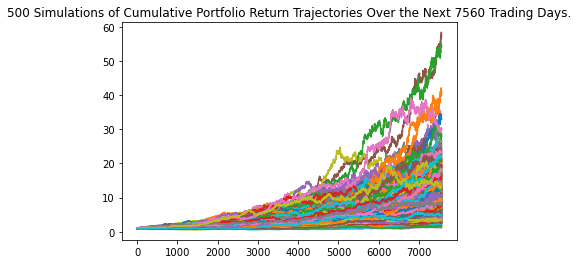

In [20]:
# Plot simulation outcomes
line_plot = MC.plot_simulation()

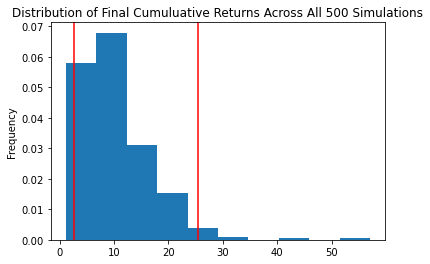

In [21]:
# Plot probability distribution and confidence intervals
dist_plot = MC.plot_distribution()

### Retirement Analysis

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean             10.424131
std               6.729506
min               1.155600
25%               5.774028
50%               8.760286
75%              13.206765
max              57.101787
95% CI Lower      2.703034
95% CI Upper     25.415024
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [23]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
even_ci_lower = round(even_tbl[8]*initial_investment,2)
even_ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio")
print (f"over the next 30 years will end within in the range of")      
print (f"${even_ci_lower} and ${even_ci_upper}")      

There is a 95% chance that an initial investment of $20000 in the portfolio
over the next 30 years will end within in the range of
$54060.69 and $508300.47


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [24]:
# Set initial investment
initial_investment_new = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
even_ci_lower_new = round(even_tbl[8]*initial_investment_new,2)
even_ci_upper_new = round(even_tbl[9]*initial_investment_new,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_new} in the portfolio")
print(f"over the next 30 years will end within in the range of")      
print(f"${even_ci_lower_new} and ${even_ci_upper_new}")      

There is a 95% chance that an initial investment of $30000.0 in the portfolio
over the next 30 years will end within in the range of
$81091.03 and $762450.71


## Optional Challenge - Early Retirement


### Five Years Retirement with Significantly Larger Initial Investmen ($100k) Option 

In [25]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [26]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002049,1.005634,0.998973,0.993277,1.005193,0.998670,0.999830,0.998325,1.005744,1.000797,...,0.998266,0.992444,1.006583,1.008750,0.989477,1.002632,0.994107,1.000807,1.014695,1.004365
2,1.007410,1.009726,1.003812,0.982184,1.006106,0.995749,1.007477,1.007966,1.003847,1.004999,...,0.999586,0.982126,1.001671,1.007340,0.980856,1.009554,0.985405,1.002721,1.008066,0.998831
3,0.997363,1.026597,1.017007,0.968065,1.007203,0.984324,1.023296,1.002455,1.005268,1.001683,...,1.000314,0.981896,0.997606,1.012903,0.983181,1.018927,1.002376,1.008663,1.010914,1.009688
4,1.005596,1.021131,1.009512,0.976645,1.008109,0.988134,1.023924,1.022933,1.003610,1.007921,...,1.008811,0.972635,1.001948,1.011571,0.987366,1.021226,1.003152,1.015970,1.015485,1.007861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.675124,2.149270,1.669027,1.314298,1.570071,0.854606,1.295436,1.141017,1.752589,1.339836,...,1.538181,1.301087,1.124143,1.686288,1.961415,1.547397,1.329262,1.295532,1.374568,1.615059
1257,1.669422,2.146478,1.662552,1.328018,1.560620,0.844117,1.300372,1.164616,1.771724,1.350823,...,1.545583,1.311632,1.123573,1.708683,1.951076,1.552000,1.327316,1.291976,1.357455,1.612714
1258,1.660937,2.129247,1.661664,1.337883,1.548038,0.845285,1.304925,1.181557,1.764402,1.349586,...,1.535149,1.284147,1.098681,1.702843,1.942625,1.555397,1.344436,1.290979,1.335457,1.627082
1259,1.665556,2.123961,1.661188,1.351725,1.543464,0.848578,1.301877,1.171057,1.761613,1.345924,...,1.549535,1.298109,1.090612,1.688996,1.959343,1.559145,1.351520,1.284134,1.341906,1.633280


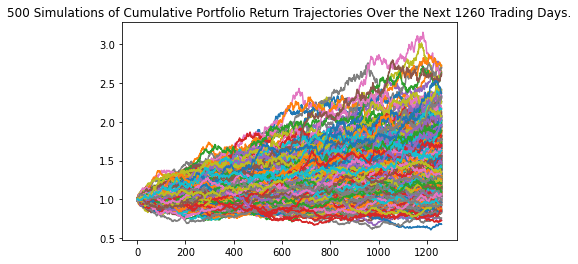

In [27]:
# Plot simulation outcomes
line_plot = MC_five.plot_simulation()

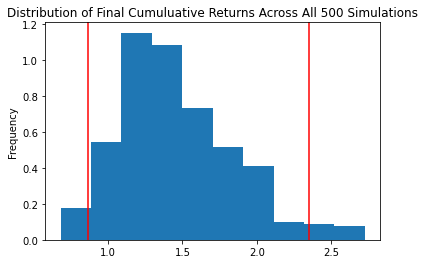

In [28]:
# Plot probability distribution and confidence intervals!
dist_plot = MC_five.plot_distribution()

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_five= MC_five.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_five)

count           500.000000
mean              1.464441
std               0.383808
min               0.680340
25%               1.178192
50%               1.407566
75%               1.699874
max               2.726469
95% CI Lower      0.863386
95% CI Upper      2.349797
Name: 1260, dtype: float64


In [30]:
# Set initial investment
initial_investment_high = 100000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes if the initial investment is $100,000
even_ci_lower_five = round(even_tbl_five[8]*initial_investment_high,2)
even_ci_upper_five = round(even_tbl_five[9]*initial_investment_high,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_high} in the portfolio")
print (f"over the next 5 years will end within in the range of")      
print (f"${even_ci_lower_five} and ${even_ci_upper_five}")      

There is a 95% chance that an initial investment of $100000 in the portfolio
over the next 5 years will end within in the range of
$86338.58 and $234979.67


### Ten Years Retirement with Significantly Larger Initial Investmen ($100k) Option

In [31]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [32]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006534,1.004649,0.991829,1.007612,0.990806,0.998805,0.995623,0.996664,1.005478,0.989177,...,1.005672,1.002599,0.997550,1.002820,0.995297,1.001411,1.004795,1.000302,0.990830,1.001606
2,1.013130,1.003849,0.983197,1.014417,0.991716,1.012310,0.999578,0.989809,0.993309,0.995191,...,1.006531,1.017267,1.012260,0.988276,0.996207,0.995916,1.004087,0.998108,0.992417,1.001008
3,1.008991,1.024978,0.975171,1.012198,0.978720,1.019531,0.992784,0.991388,0.998523,0.996288,...,1.007109,1.021047,1.010181,0.981303,0.990289,1.005138,1.000492,0.997862,0.998655,1.002420
4,1.013611,1.027328,0.971711,1.019349,0.966895,1.018207,0.979652,0.988986,0.995930,0.988755,...,1.010900,1.016066,1.005104,0.986194,0.978649,1.000137,0.998079,1.009631,1.003834,1.017268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.032411,1.091920,2.577066,2.902210,1.282798,2.033510,1.950433,2.357944,1.434252,2.736120,...,2.338916,1.891072,1.689472,2.554378,1.982027,2.689785,2.701233,1.883566,1.371683,1.350761
2517,2.980281,1.093517,2.598014,2.904632,1.278737,2.053187,1.963678,2.365363,1.422031,2.713770,...,2.375601,1.902023,1.690549,2.558953,1.974997,2.699460,2.691586,1.880314,1.360357,1.350537
2518,2.995948,1.091233,2.589961,2.913233,1.286189,2.098036,1.966469,2.377171,1.432274,2.677033,...,2.361126,1.899237,1.675320,2.566236,1.949796,2.705615,2.694013,1.860782,1.374832,1.341421
2519,2.981714,1.077520,2.560578,2.953763,1.286455,2.091361,1.987160,2.353952,1.424902,2.676682,...,2.380746,1.907817,1.668498,2.569709,1.949041,2.691511,2.692298,1.841392,1.396813,1.333204


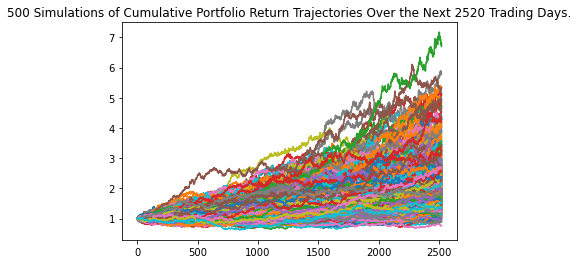

In [33]:
# Plot simulation outcomes
line_plot = MC_ten.plot_simulation()

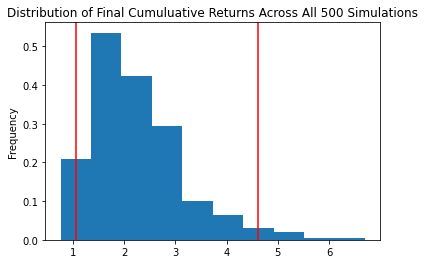

In [34]:
# Plot probability distribution and confidence intervals
dist_plot = MC_ten.plot_distribution()

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_ten= MC_ten.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_ten)

count           500.000000
mean              2.244811
std               0.895377
min               0.757907
25%               1.600598
50%               2.078998
75%               2.664595
max               6.700232
95% CI Lower      1.065196
95% CI Upper      4.609515
Name: 2520, dtype: float64


In [36]:
# Set initial investment
initial_investment_high = 100000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $100,000
even_ci_lower_ten = round(even_tbl_ten[8]*initial_investment_high,2)
even_ci_upper_ten = round(even_tbl_ten[9]*initial_investment_high,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_high} in the portfolio")
print (f"over the next 10 years will end within in the range of")      
print (f"${even_ci_lower_ten} and ${even_ci_upper_ten}")      


There is a 95% chance that an initial investment of $100000 in the portfolio
over the next 10 years will end within in the range of
$106519.55 and $460951.45
